Классификация автомобилей по фотографии
===============================================================

![](Car_classification.jpg)

[Ноутбук на Kaggle](https://www.kaggle.com/andreikukunov/sf-car-classification-ak)

### Лучшие значения метрик:
| val_accuracy | Kaggle Score | 
| :-: | :-: |
| 0.9747 | [0.9703](https://www.kaggle.com/competitions/sf-dl-car-classification/leaderboard?search=andreikukunov) | 



### Цель данного учебного Data Science проекта
 * изучить реальную задачу компьютерного зрения на практике

<br>

## Что сделано


> **Выбор предобученной модели**
> * на основе статистических данных отобраны несоклько наиболее эффективных моделей от EfficientNet: B3, B5, B6, B7
> * в дальнейшем, после серии тестовых обучений выбрана самая эффективная из них (для данной задачи) -- EfficientNetB3

> **Аугментация изображений**
> * Опробованы библиотеки: `albumentations` и `ImageDataGenerator`
> * Выбраны аугментаций, нилучшим образом имитирующие естественные условия съемки: освещение, вращение, переворот, сдвиг
> * Подобраны их естественные параметры
> * Эксперименты с моделями показали, что обработка albumentations для данной задачи более затратна по времени, а результат не улучшает. 
> * Выбор пал на более удобный `ImageDataGenerator`
> * Выполнена также TTA (Test-time augmentation)

> **Размер изображений**
> * Опробованы стандартные размеры изобажений (для лучшей пиксельности): 160x213 ; 240x320 ; 480x640
> * а также -- квадратные (для математики): 320x320; 480x480
> * Наиболее эффективными оказались испробованные квадратные размеры.


> **Настройка процесса обучения**
> * Размер валидационой выборки -- 0.3
> * Callbacks: ReduceLROnPlateau, EarlyStopping, tensorboard_callback


> **FineTuning и до-обучение на разных размерах изображений**
> * Опробовaны разные степени разморозки слоев предобученной модели: 0%, 10%, 33%, 50%, 66%, 100%
> * Опробовано разное количество этапов обучения: от 1 до 3


> **Усреднение предсказаний**
> * Предсказания выполнены 5 раз и усреднены
  
<br>
  
## Результаты
> **Наилучшая комбинация методов и параметров обучения (метрика/время):**  
> EfficientNetB3, 100% слоев разморожены на всех этапах FineTuning (stages)  
> (Колонка val_accuracy в таблице: first epoch  --> last epoch)

| Stage | Image_Size | max_Lr | min_Lr | epochs |  each epoch time | time total | val_accuracy | Kaggle Score |
| -: | :- | :- | :- | :- | :- | :- | :- | :- |
| 1 | 320x320 | 0.0005 | 0.00005 | 15 | 8 minutes | 120 minutes | 0.9262 --> 0.9717 | 0.9655 |
| 2 | 480x480 | 0.00005 | 0.00001 | 5 | 17 minutes | 85 minutes | 0.9721 --> **0.9747** | **0.9703** |

<br>

> **Другие варианты обучения:**

| Stage | base_model.trainable | Image_Size | max_Lr | min_Lr | epochs | each epoch time | time total | val_accuracy |
| -: | :- | :- | :- | :- | :- | :- | :- | :- |
| 1 | B3 10% | 160x213 | 0.0009 | 0.0001 | 5 | 3.6 minutes | 18 minutes | 0.8407 --> 0.9434 |
| 2 | B3 50% | 240x320 | 0.0002 | 0.0001 | 5 | 6 minutes | 30 minutes | 0.9614 --> 0.9657 |
| 3 | B3 100% | 480x640 | 0.0001 | 0.00005 | 5 | 22 minutes | 110 minutes | 0.9657 --> **0.9715** |
| - | - | - | - | - | - | - | - | - |
| 1 | B5 0% | 160x213 | 0.0003 | 0.00001 | 5 | 5 minutes | 25 minutes | 0.8791 --> 0.9417 |
| 2 | B5 33% | 160x213 | 0.0003 | 0.00001 | 5 | 5 minutes | 25 minutes | 0.9507 --> 0.9513  |
| 3 | B5 100% | 240x320 | 0.0003 | 0.00001 | 5 | 6.6 minutes | 33 minutes | 0.9633 --> 0.9659  |
| 4 | B5 100% | 480x640 | 0.0003 | 0.00001 | 5 | 48 minutes | 240 minutes | 0.9675 --> **0.9738**  |
| - | - | - | - | - | - | - | - | - |
| 1 | B7 0% | 160x213 | 0.0005 | 0.00005 | 10 | 5.3 minutes | 53 minutes | 0.8523 --> 0.9614 |
| 2 | B7 33% | 160x213 | 0.0003 | 0.00001 | 5 | 5.4 minutes | 27 minutes | 0.9443 --> 0.9533  |
| 3 | B7 100% | 240x320 | 0.0001 | 0.00001 | 4 | 13.5 minutes | 54 minutes | 0.9636 --> 0.9691  |
| 4 | B7 100% | 480x640 | 0.0005 | 0.00005 | 5 | 62 minutes | 310 minutes | 0.9711 --> **0.9745**  |


> Остальные результаты испытаний записаны в соответствующих ячейках



# 
## Setup

In [ ]:
#!nvidia-smi -L

In [ ]:
# Заускаем железо TPU на Kaggle

# detect and init the TPU
#tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()

# instantiate a distribution strategy
#tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

In [ ]:
# подготавливаем данные

# для Google Colab:
#!gsutil cp gs://oleg-zyablov/skillfactory/sf-dl-car-classification.zip .
#!unzip sf-dl-car-classification.zip
#!unzip -q -o sf-dl-car-classification/train.zip
#!unzip -q -o sf-dl-car-classification/test.zip
#sample_submission_path = '/content/sf-dl-car-classification/sample-submission.csv'
#train_path = '/content/train/'
#sub_path = '/content/test_upload/'


# для Kaggle Kernel (работает)
!mkdir ../temp #папка для временных файлов
!unzip ../input/sf-dl-car-classification/train.zip -d ../temp
!unzip ../input/sf-dl-car-classification/test.zip -d ../temp
sample_submission_path = '../input/sf-dl-car-classification/sample-submission.csv'
##!mkdir ../temp/train/  # уже есть
##!mkdir ../temp/test_upload/  # уже есть
train_path = '../temp/train/'
sub_path = '../temp/test_upload/'
# %cd /kaggle/working  #переходим в рабочую директорию




# для локальной работы
#os.mkdir('temp')
#os.mkdir('temp/train')
#os.mkdir('temp/test_upload')
#train_path = 'sf-dl-car-classification/train'
#sub_path = 'temp/test_upload'
#sample_submission_path = 'sf-dl-car-classification/sample-submission.csv'


In [ ]:
sample_submission_path = '../input/sf-dl-car-classification/sample-submission.csv'
train_path = '../temp/train/'
sub_path = '../temp/test_upload/'

In [7]:
# ИМПОРТЫ

import os, re, math, random, time, gc, string, pickle, shutil, pathlib, itertools
import numpy as np, pandas as pd, matplotlib.pyplot as plt, PIL

import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import *
from tensorflow.keras.activations import *
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.layers import *
from tensorflow.keras.layers.experimental.preprocessing import *
from tensorflow.keras.losses import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.optimizers.schedules import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from PIL import Image
from IPython.display import clear_output
from tqdm.notebook import tqdm


from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers.schedules import *




#имена классов
class_names = [
  'Приора', #0
  'Ford Focus', #1
  'Самара', #2
  'ВАЗ-2110', #3
  'Жигули', #4
  'Нива', #5
  'Калина', #6
  'ВАЗ-2109', #7
  'Volkswagen Passat', #8
  'ВАЗ-21099' #9
]

### **Создаем генераторы изображений**

In [ ]:
# Стандартные размеры изобажений: 160, 213 ; 240, 320 ; 480, 640 ;   было 90, 120

def datagen_IDG_train(image_size = (160, 213), batch_size = 8):
    train_datagen = ImageDataGenerator(
        #rescale=1/255,
        validation_split=0.3,
        # ниже параметры аугментаций:
        horizontal_flip=True,
        rotation_range=10,
        shear_range=10,
    #    brightness_range=(0.7, 1.3),
        channel_shift_range=90,
        fill_mode='nearest'
    )

    train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True,
        seed=0,
        subset='training'
    )

    return train_generator

In [ ]:
# Стандартные размеры изобажений: 160, 213 ; 240, 320 ; 480, 640 ;   было 90, 120

def datagen_IDG_val(image_size = (160, 213), batch_size = 32):

    val_datagen = ImageDataGenerator(
        #rescale=1/255,
        validation_split=0.3,
    )

    val_generator = val_datagen.flow_from_directory(
        train_path,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True,
        seed=0,
        subset='validation'
    )

    return val_generator

In [ ]:
# Стандартные размеры изобажений: 160, 213 ; 240, 320 ; 480, 640 ;   было 90, 120

def datagen_IDG_sub(image_size = (480, 640), batch_size = 16):

    sub_datagen = ImageDataGenerator(
        #rescale=1/255
    )

    sub_generator = sub_datagen.flow_from_dataframe( 
        dataframe=pd.read_csv(sample_submission_path),
        directory=sub_path,
        x_col="Id",
        y_col=None,
        class_mode=None,
        target_size=image_size,
        batch_size=batch_size,
        shuffle=False
    )
    return sub_generator

In [ ]:
def show_first_images(generator, count=6, labels=True, figsize=(20, 5), normalized=False):
  generator = itertools.islice(generator, count)
  fig, axes = plt.subplots(nrows=1, ncols=count, figsize=figsize)
  for batch, ax in zip(generator, axes):
    if labels:
      img_batch, labels_batch = batch
      img, label = img_batch[0], np.argmax(labels_batch[0]) #берем по одному изображению из каждого батча
    else:
      img_batch = batch
      img = img_batch[0]
    if not normalized:
      img = img.astype(np.uint8)
    ax.imshow(img)
    # метод imshow принимает одно из двух:
    # - изображение в формате uint8, яркость от 0 до 255
    # - изображение в формате float, яркость от 0 до 1
    if labels:
      ax.set_title(f'Class: {label}')
  plt.show()

In [ ]:
print('Train:')
show_first_images(datagen_IDG_train())

print('Val:')
show_first_images(datagen_IDG_val())

print('Sub:')
show_first_images(datagen_IDG_sub(), labels=False)

## Загрузка готовой модели и submission

### Test-time augmentations (TTA)


In [2]:
# Загрузка готовой модели
#best_model = keras.models.load_model('best_model.h5')
best_model = keras.models.load_model('../input/d/andreikukunov/sf-dl-car-classification/best_model (9717 320-320).h5') 

2022-09-18 10:41:48.176664: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [ ]:
# для модели с fine tuning (задано выше)

# Сделаем предсказания 5 раз:

predictions = []
for _ in range(5):
  predictions.append(best_model.predict(datagen_IDG_sub(image_size = (320, 320), batch_size = 2), verbose=1))
  sub_generator.reset()
predictions = np.array(predictions)
predictions.shape

#### final_predictions

In [ ]:
# Нулевая ось - номер попытки, первая ось - номер изображения, вторая ось - номер класса.
# Теперь нам нужно сделать усреднение по номеру попытки, а затем argmax по номеру класса (не наоборот!):

final_predictions = predictions.mean(axis=0).argmax(axis=-1)
final_predictions

In [ ]:
# Мы также можем посмотреть насколько совпали предсказания на каждом изображении с разными аугментациями (цвет на изображении означает класс):

plt.figure(figsize=(15, 3))
plt.imshow(predictions.argmax(axis=-1)[:, :50], cmap='nipy_spectral')
plt.xlabel('Номер изображения')
plt.ylabel('Номер попытки')
plt.show()

In [ ]:
# Заполняем предсказаниями sample-submission.csv и сохраняем

sample_submission_df =pd.read_csv(sample_submission_path)
sample_submission_df.Category = final_predictions
sample_submission_df.to_csv('final_predictions_TTA_9717.csv', index=False)
sample_submission_df.sample(3)

In [ ]:
# Из бейзлайна
'''
# Сделаем файл для сабмита:

predictions = model.predict(sub_generator, verbose=1)
predictions = predictions.argmax(axis=1)

submission = pd.DataFrame({
    'Id': sub_generator.filenames,
    'Category': predictions
}, columns=['Id', 'Category'])
submission.to_csv('submission.csv', index=False)
'''

### Получение предсказания модели на стороннем изображении
Для проверки работы модели достаточно 

In [6]:
# Для проверки работы модели достаточно загрузить вот это:

from tensorflow import keras
import numpy as np, matplotlib.pyplot as plt
best_model = keras.models.load_model('../input/d/andreikukunov/sf-dl-car-classification/best_model (9717 320-320).h5') 

#имена классов
class_names = [
  'Приора', #0
  'Ford Focus', #1
  'Самара', #2
  'ВАЗ-2110', #3
  'Жигули', #4
  'Нива', #5
  'Калина', #6
  'ВАЗ-2109', #7
  'Volkswagen Passat', #8
  'ВАЗ-21099' #9
]

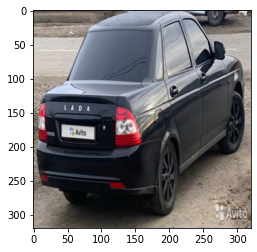

Приора


In [24]:
# скачиваем изображение по URL (можно имспользовать любой ваш URL)

# https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/1987_Lada_Niva_1600.jpg/800px-1987_Lada_Niva_1600.jpg
# https://30.img.avito.st/640x480/10355767530.jpg
    
img_url = 'https://30.img.avito.st/640x480/10355767530.jpg'

!wget -q img_url

    
# какого размера изображение модель принимает на вход?
img_size = np.array(best_model.input.shape)[[2, 1]]


# загружаем изображение с помощью cv2
# import cv2
# image = cv2.imread('car.jpg', cv2.IMREAD_COLOR)[..., ::-1] #cv2.imread читает в формате BGR, конвертируем в RGB с помощью индекса ::-1
# image = cv2.imread('https://30.img.avito.st/640x480/10355767530.jpg', cv2.IMREAD_COLOR)[..., ::-1] #cv2.imread читает в формате BGR, конвертируем в RGB с помощью индекса ::-1
# image = cv2.resize(image, img_size)


# или загружаем изображение с помощью PIL
from PIL import Image
image = np.array(Image.open(f"./{img_url.split('/')[-1]}").convert('RGB').resize(img_size))

# image = np.array(Image.open('car.jpg').convert('RGB').resize(img_size)) #.convert('RGB') нужен на случай, если изображение черно-белое
# image = np.array(Image.open('./800px-1987_Lada_Niva_1600.jpg').convert('RGB').resize(img_size)) #.convert('RGB') нужен на случай, если изображение черно-белое


plt.imshow(image)
plt.show()

# превращаем изображение в батч из одного изображения, добавляя новую ось в начале
image = image[None, ...]

# делаем нормализацию, если это нужно для нашей модели
# image = image / 255

# получаем батч предсказаний и берем нулевой элемент
pred = best_model.predict(image)[0]

# берем индекс класса с максимальным значением
class_idx = pred.argmax()

# получаем название
print(class_names[class_idx])

## Аугментации

Пробуем аугментации от разных производителей, настраиваем их и проверяем в работе моделей.

### Аугментация, встроенная в ImageDataGenerator.

[Примеры обработки](https://www.machinelearningmastery.ru/exploring-image-data-augmentation-with-keras-and-tensorflow-a8162d89b844/)

[Документация](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)


Она оказалась **удобной** для настройки и **эффективной** для работы с марками автомобилей, несмотря на **скромный набор** встроенных инструментов.

Берем одну из имеющихся картинок и пробуем на глаз подобрать варианты ее изменения, сопоставимые с **разными условиями съемки**: освещение, четкость, сдвиг...

In [ ]:
# https://www.machinelearningmastery.ru/exploring-image-data-augmentation-with-keras-and-tensorflow-a8162d89b844/

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib.pyplot import imread, imshow, subplots, show


def plot(data_generator):
    """
    Plots 4 images generated by an object of the ImageDataGenerator class.
    """
    data_generator.fit(images)
    image_iterator = data_generator.flow(images)
    
    # Plot the images given by the iterator
    fig, rows = subplots(nrows=1, ncols=4, figsize=(18,18))
    for row in rows:
        row.imshow(image_iterator.next()[0].astype('int'))
        row.axis('off')
    show()


# или загружаем изображение с помощью PIL
#from PIL import Image
#image = np.array(Image.open('car.jpg').convert('RGB').resize(img_size))


#!wget -q https://storage.googleapis.com/oleg-zyablov/skillfactory/car.jpg
#image = imread('car.jpg')

# из имеющихся
image = imread('/content/train/0/100155.jpg')
#image = imread('sf-dl-car-classification/train/0/100155.jpg')  # локально


# Creating a dataset which contains just one image.
images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

imshow(images[0])
show()

In [ ]:
# Сдвиг
data_generator = ImageDataGenerator(shear_range=20.0)
plot(data_generator)

In [ ]:
# "Разное время суток"
data_generator = ImageDataGenerator(channel_shift_range=90.0)
plot(data_generator)

#### Создаем генераторы изображений для основного обучения
Пробуем разные около-стандартные размеры.

(оквадарачивание 1х1 не применяем, чтоб сохранить естественность пропорций в реальных условиях)

In [ ]:
image_size = (240, 320) # 160, 213 ; 240, 320 ; 480, 640 ;   было 90, 120
batch_size = 32

train_datagen = ImageDataGenerator(
    #rescale=1/255,
    validation_split=0.3,
    # ниже параметры аугментаций:
    horizontal_flip=True,
    rotation_range=10,
    shear_range=10,
#    brightness_range=(0.7, 1.3),
    channel_shift_range=90,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    #rescale=1/255,
    validation_split=0.3,
)

sub_datagen = ImageDataGenerator(
    #rescale=1/255
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=0,
    subset='training'
)

val_generator = val_datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=0,
    subset='validation'
)

sub_generator = sub_datagen.flow_from_dataframe( 
    dataframe=pd.read_csv(sample_submission_path),
    directory=sub_path,
    x_col="Id",
    y_col=None,
    class_mode=None,
    target_size=image_size,
    batch_size=batch_size,
    shuffle=False
)

In [ ]:
def show_first_images(generator, count=6, labels=True, figsize=(20, 5), normalized=False):
  generator = itertools.islice(generator, count)
  fig, axes = plt.subplots(nrows=1, ncols=count, figsize=figsize)
  for batch, ax in zip(generator, axes):
    if labels:
      img_batch, labels_batch = batch
      img, label = img_batch[0], np.argmax(labels_batch[0]) #берем по одному изображению из каждого батча
    else:
      img_batch = batch
      img = img_batch[0]
    if not normalized:
      img = img.astype(np.uint8)
    ax.imshow(img)
    # метод imshow принимает одно из двух:
    # - изображение в формате uint8, яркость от 0 до 255
    # - изображение в формате float, яркость от 0 до 1
    if labels:
      ax.set_title(f'Class: {label}')
  plt.show()

print('Train:')
show_first_images(train_generator)

print('Val:')
show_first_images(val_generator)

print('Sub:')
show_first_images(sub_generator, labels=False)

### Аугментации с помощью библиотеки albumentations:

Эксперименты с моделями показали, что обработка albumentations для данной задачи более затратна по времени, а результат не улучшает.

In [ ]:
import albumentations as A

def augment(image):
  image = image.astype(np.uint8)
  aug = A.Compose([
      # https://albumentations.ai/docs/api_reference/augmentations/transforms/
      # https://albumentations.ai/docs/examples/example/
      A.HorizontalFlip(p=0.5),
      A.ToGray(p=0.15),
  #    A.ToSepia(p=0.25),
#      A.OneOf([
#          A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3),
#          A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1)
#      ],p=0.35),
      A.ShiftScaleRotate(always_apply=False, p=0.25, shift_limit=(-0.06, 0.06), rotate_limit=(-10, 10), interpolation=0, border_mode=0), # ,  value=(0, 0, 0), mask_value=None
#      A.Blur(p=0.1),
#      A.HueSaturationValue(p=0.25),
#      A.RandomShadow(shadow_roi=(0, 0.5, 1, 1), num_shadows_lower=1, num_shadows_upper=2, shadow_dimension=5, always_apply=False, p=0.25),
      A.RandomBrightnessContrast(p=0.25),
      A.OpticalDistortion(p=0.25),
#      A.RandomSnow(p=0.25),




  ])
  return aug(image=image)['image']

my_datagen = ImageDataGenerator(
    preprocessing_function=augment
)

for _ in range(3):
  my_generator = my_datagen.flow_from_directory(
      train_path,
      target_size=(160, 213),
      batch_size=1,
      shuffle=True,
      seed=0
  )
  show_first_images(my_generator)

#### Применяем albumentations к выборкам

In [ ]:
# Генераторы аугментированных изображений

image_size = (240, 320) # 160, 213 ; 240, 320 ; было 90, 120
batch_size = 32

train_datagen_aug = ImageDataGenerator(
    #rescale=1/255,
    validation_split=0.3,
    # ниже параметры аугментаций:
    preprocessing_function=augment
)


val_datagen_aug = ImageDataGenerator(
    #rescale=1/255,
    validation_split=0.3,
)

sub_datagen = ImageDataGenerator(
    #rescale=1/255
)

train_generator_aug = train_datagen_aug.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=0,
    subset='training'
)

val_generator_aug = val_datagen_aug.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=0,
    subset='validation'
)

sub_generator = sub_datagen.flow_from_dataframe( 
    dataframe=pd.read_csv(sample_submission_path),
    directory=sub_path,
    x_col="Id",
    y_col=None,
    class_mode=None,
    target_size=image_size,
    batch_size=batch_size,
    shuffle=False
)

In [ ]:
# для обучения
for _ in range(3):
  train_generator_aug = train_datagen_aug.flow_from_directory(
      train_path,
      target_size=(384, 512),
      batch_size=1,
      shuffle=True,
      seed=0
  )
  show_first_images(train_generator_aug)

In [ ]:
# для валидации
for _ in range(3):
  val_generator_aug = my_datagen.flow_from_directory(
      train_path,
      target_size=(384, 512),
      batch_size=1,
      shuffle=True,
      seed=0
  )
  show_first_images(val_generator_aug)

## Модели и обучение

На основе данных сервиса [paperswithcode](https://paperswithcode.com/sota/image-classification-on-imagenet) были отобраны самые эффективные предобученные на ImageNet модели. 

**Критерий эффективности -- соотношение точности и времени обработки шага.**

Модель **EfficientNetB3** оказалась самой привлекательной. При не самой высокой точности (по сравнению с B6 и B7, которые также были испробованы в данной работе) в условиях ограничений Colab ее результат оказался достаточно высоким.

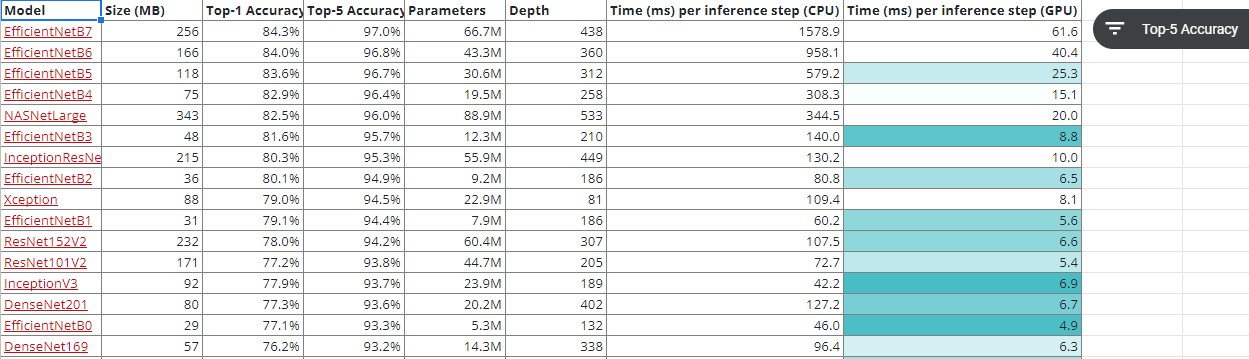

In [ ]:
import tensorflow.keras.backend as K
K.clear_session()

In [ ]:
# Для обнуления модели
from numba import cuda
cuda.select_device(0)
cuda.close()

### FineTuning (постепенная разморозка слоев)

#### Строим модель

In [ ]:
# Base Setups

lr = 0.0005
min_Lr = 0.00005
Epochs = 10

Image_Size = (160, 213)
Batch_Size = 32

## Стандартные размеры фото: 160, 213 ; 240, 320 ; 320, 427 ; 480, 640 ;   было 90, 120

In [ ]:
# Callbacks

reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=lr/5,
                              patience=1, min_lr=min_Lr)

Checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy',
                verbose=1, mode='max', save_best_only=True) # val_loss

Stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

tensorboard_callback = tf.keras.callbacks.TensorBoard() # log_dir="./logs"

In [ ]:
# С TPU !!!


tf.compat.v1.disable_eager_execution()

# instantiating the model in the strategy scope creates the model on the TPU
with tpu_strategy.scope():
    # предобученная нейросеть из модуля keras.applications
    base_model = EfficientNetB7(weights='imagenet', input_shape=(*Image_Size, 3), include_top=False)

    model_1 = Sequential([
      base_model,
      GlobalMaxPool2D(),
      Dropout(0.5),
      Dense(10)
    ])


    steps = 341
    # Epochs = 20

    model_1.compile(
        loss=CategoricalCrossentropy(from_logits=True),
    #    optimizer=Adam(ExponentialDecay(0.0005, steps*Epochs, 0.9, staircase=False)), # 
        optimizer=Adam(learning_rate=lr), # для управления колбэком
    #    optimizer=optimizer, # с подстройкой lr
        metrics='accuracy'
    )

    model_1.summary()

In [ ]:
## строим модель 


# предобученная нейросеть из модуля keras.applications
base_model = EfficientNetB3(weights='imagenet', input_shape=(*Image_Size, 3), include_top=False)

model_1 = Sequential([
  base_model,
  GlobalMaxPool2D(),
  Dropout(0.5),
  Dense(10)
])

 
steps = 341
# Epochs = 20

model_1.compile(
    loss=CategoricalCrossentropy(from_logits=True),
#    optimizer=Adam(ExponentialDecay(0.0005, steps*Epochs, 0.9, staircase=False)), # 
    optimizer=Adam(learning_rate=lr), # для управления колбэком
#    optimizer=optimizer, # с подстройкой lr
    metrics='accuracy'
)

model_1.summary()

In [ ]:
# Загрузка сохраненной модели (шаг 2 обычно пройден)
model_1 = keras.models.load_model('best_model.h5')

In [ ]:
# Загрузка модели для дообучения
model_1 = keras.models.load_model('../input/d/andreikukunov/sf-dl-car-classification/best_model (9747 480-480).h5') 

In [ ]:
# Загрузка весов из лучшей сохраненной модели
#model_1.load_weights('best_model.h5')

#### Stage 1

In [ ]:
## B5 0%
# 10 Epochs, val_acc 0.8190 --> 0.9312  (после 5 эп. 0.9072), 50 minutes (при batch_size = 32 и Lr 0.0003 => 0.00001)
#  5 Epochs, val_acc 0.8791 --> 0.9417                      , 25 minutes (при batch_size = 32 и Lr 0.0003 => 0.00001)

#--------- для base_model off -----------

# B6  7 Epochs, val_acc 0.8473 --> 0.9505                      , 4.5*7 minutes (при batch_size = 32 и Lr 0.0005 => 0.00009)
# B3 10 Epochs, val_acc 0.8355 --> 0.9518  (после 5 эп. 0.9292), 3*10 minutes (при batch_size = 32 и Lr 0.0005 => 0.00005)
# B7 10 Epochs, val_acc 0.8797 --> 0.9563  (после 5 эп. 0.9492), 5.3*10 minutes (при batch_size = 32 и Lr 0.0005 => 0.00005)
# B7 10 Epochs, val_acc 0.8523 --> 0.9614  (после 5 эп. 0.9543), 5.3*10 minutes (при batch_size = 32 и Lr 0.0005 => 0.00005)



base_model.trainable = False
print(f"В базовой модели {len(base_model.layers)} слоев, из них {len(base_model.trainable_variables)} включены")
model_1.summary()

model_1.fit(datagen_IDG_train(Image_Size, Batch_Size), validation_data=datagen_IDG_val(Image_Size, Batch_Size), callbacks=[reduce_lr, Checkpoint, Stopping, tensorboard_callback], epochs=Epochs) # Epochs

In [ ]:
%load_ext tensorboard
#%reload_ext tensorboard
%tensorboard --logdir logs/validation

#### Stage 2

In [ ]:
# Setups

lr = 0.0002
min_Lr = 0.00001
Epochs = 3

Image_Size = (160, 213)
Batch_Size = 32
## Стандартные размеры фото: 160, 213 ; 240, 320 ; 480, 640 ;

In [ ]:
# Отключаем/включаем слои в базовой модели

base_model.trainable = False
base_model.trainable = True

freeze_at = int(len(base_model.layers)*.66)

for layer in base_model.layers[:freeze_at]:
    layer.trainable =  False

print(f"В базовой модели {len(base_model.layers)} слоев, из них {len(base_model.trainable_variables)} включены")
model_1.summary()

In [ ]:
# ------------ как первый этап ----------------
# B3 10% + callbacks  ReduceLROnPlateau lr 0.0009, image_size = (160, 213) batch_size = 32, validation_split=0.3 
# 5 Epochs, val_acc 0.8407 --> 0.9434 , 18 minutes (при batch_size = 32 и min_Lr = 0.0001)
# 5 Epochs, val_acc 0.8345 --> 0.9312 , 19 minutes (при batch_size = 16 и min_Lr = 0.00001)

# 10 Epochs, val_acc 0.7809 --> 0.9316 (после 5 эп. 0.9007), 35 minutes (при batch_size = 8 и Lr 0.0009 => 0.00009)

# B6 5%
# 10 Epochs, val_acc 0.8184 --> 0.9312  (после 5 эп. 0.9091), 50 minutes (при batch_size = 32 и Lr 0.0009 => 0.00009)

# B5 10%
# 10 Epochs, val_acc 0.8289 --> 0.9312  (после 5 эп. 0.9091), 50 minutes (при batch_size = 32 и Lr 0.0001 => 0.00001)

# ------------ как второй этап ----------------
# B5 33% 
# 5 Epochs, val_acc 0.9507 --> 0.9513                       , 25 minutes (при batch_size = 32 и Lr 0.0003 => 0.00001)

# B7 33% 
# 5 Epochs, val_acc 0.9443 --> 0.9533                       , 27 minutes (при batch_size = 32 и Lr 0.0003 => 0.00001)


model_1.fit(datagen_IDG_train(Image_Size, Batch_Size), validation_data=datagen_IDG_val(Image_Size, Batch_Size), callbacks=[reduce_lr, Checkpoint, Stopping, tensorboard_callback], epochs=Epochs) # Epochs

B3 10%, 10 Epochs, val_acc 0.7809 --> 0.9316 (после 5 эп. 0.9007), 35 minutes (при batch_size = 8 и min_Lr = 0.00009):  

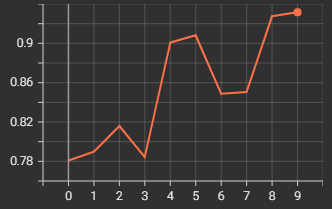


B6 5%, 10 Epochs, val_acc 0.8184 --> 0.9312  (после 5 эп. 0.9091), 50 minutes (при batch_size = 16 и min_Lr = 0.0.0009):  
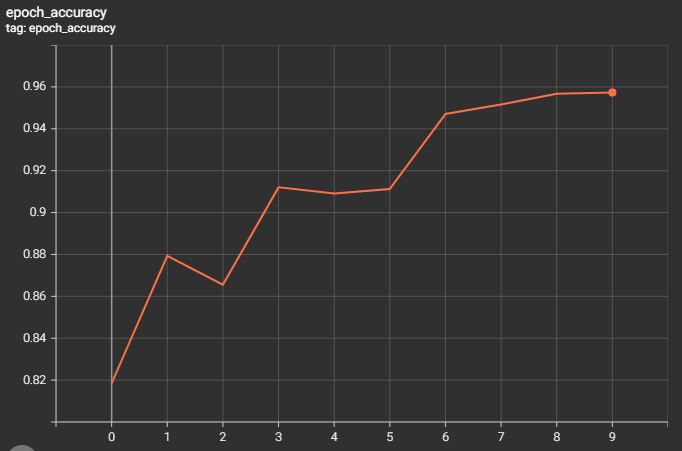 


B5 10%, 10 Epochs, val_acc 0.8681 --> 0.9312  (после 5 эп. 0.9091), 50 minutes (при batch_size = 32 и Lr 0.0005 => 0.00001):  

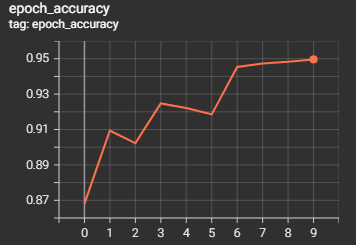


In [ ]:
%load_ext tensorboard
#%reload_ext tensorboard
%tensorboard --logdir logs/validation

#### Stage 3

In [ ]:
# Setups

lr = 0.0005
min_Lr = 0.00005
Epochs = 5


Image_Size = (320, 320)
Batch_Size = 8


## Стандартные размеры фото: 160, 213 ; 240, 320 ; 480, 640 ;   было 90, 120

In [ ]:
# B7   0%   3 Epochs, val_acc 0.9659 --> 0.9659 (1) ,  *5 minutes (при batch_size = 8  и min_Lr = 0.00005)

# как первый этап!
# B7   0%   5 Epochs, val_acc 0.8630 --> 0.9636 (5) ,  *5 minutes (при batch_size = 8  и min_Lr = 0.00005)



base_model.trainable = False
model_1.fit(datagen_IDG_train(Image_Size, Batch_Size), validation_data=datagen_IDG_val(Image_Size, Batch_Size), callbacks=[reduce_lr, Checkpoint, Stopping, tensorboard_callback], epochs=Epochs) # Epochs

In [ ]:
# Отключаем/включаем слои в базовой модели

base_model.trainable = False
base_model.trainable = True

freeze_at = int(len(base_model.layers)*.01)

for layer in base_model.layers[:freeze_at]:
    layer.trainable =  False

print(f"В базовой модели {len(base_model.layers)} слоев, из них {len(base_model.trainable_variables)} включены")
model_1.summary()

In [ ]:
# из Colab

# пробуем квадрат Image_Size = (320, 320)  --  как единственный этап
# B3 100% 10 Epochs, val_acc 0.9284 --> 0.9723 (10)  (после 5 эп. 0.9451), 10*10 minutes (при batch_size = 16 и Lr 0.0005 => 0.00005)
# B3 100% 15 Epochs, val_acc 0.9262 --> 0.9717 (15)  (после 5 эп. 0.9631), 15*8 minutes (при batch_size = 8 и Lr 0.0005 => 0.00005)

# B6 50% 15 Epochs, val_acc 0.9215 --> 0.9608 (12)  (после 5 эп. 0.9468), 15*13 minutes (при batch_size = 8 и Lr 0.0005 => 0.00005)


model_1.fit(datagen_IDG_train(Image_Size, Batch_Size), validation_data=datagen_IDG_val(Image_Size, Batch_Size), callbacks=[reduce_lr, Checkpoint, Stopping, tensorboard_callback], epochs=Epochs) # Epochs

In [ ]:
# B3 50% + callbacks  ReduceLROnPlateau lr 0.0002, image_size = (240, 320) batch_size = 32, validation_split=0.3 
# 5 Epochs, val_acc 0.9614 --> 0.9657 , 6*5 minutes (при batch_size = 32 и min_Lr = 0.0001)
# 5 Epochs, val_acc 0.9466 --> 0.9558 , 6.2*5 minutes (при batch_size = 16 и min_Lr = 0.00001)

# 5 Epochs, val_acc 0.9294 --> 0.9612 , 33 minutes (при batch_size = 8  и min_Lr = 0.00001)

# B6 50%  !!!
# 3 Epochs, val_acc 0.9640 --> 0.9697 , 11*3 minutes (при batch_size = 8  и min_Lr = 0.00001)


# B5 100% 
# 5 Epochs, val_acc 0.9633 --> 0.9659 , 6.6*5 minutes (при batch_size = 8  и min_Lr = 0.00001)

# B7 100% 
# 4 Epochs, val_acc 0.9636 --> 0.9691 , 13.5*4 minutes (при batch_size = 8  и min_Lr = 0.00001)

 
# B6 100%   4 Epochs, val_acc 0.9636 --> 0.9642 ,  44*4 minutes (при batch_size = 8  и min_Lr = 0.00009)
# B3 100%   5 Epochs, val_acc 0.9659 --> 0.9704 (3) ,  6*5 minutes (при batch_size = 8  и min_Lr = 0.00005)

# B7  50%   5 Epochs, val_acc 0.9498 --> 0.9470 не улучшилось вообще!, *5 minutes (при batch_size = 8 и Lr 0.0005 => 0.00005)

# после такого же с необучаемыми слоями val_acc 0.8630 --> 0.9636, переключения LR не было, + 1 эпоха 3-го шага
# B7  50%   5 Epochs, val_acc 0.9644 --> 0.9, *5 minutes (при batch_size = 8 и Lr 0.0005 => 0.00005)


# как первый этап! Image_Size = (320, 320)
# B3 100% 10 Epochs, val_acc 0.9305 --> 0.9711 (10)  (после 5 эп. 0.9691 (5)), 13.3*10 minutes (при batch_size = 32 и Lr 0.0005 => 0.00005)







model_1.fit(datagen_IDG_train(Image_Size, Batch_Size), validation_data=datagen_IDG_val(Image_Size, Batch_Size), callbacks=[reduce_lr, Checkpoint, Stopping, tensorboard_callback], epochs=Epochs) # Epochs

In [ ]:
model_1.fit(datagen_IDG_train(Image_Size, Batch_Size), validation_data=datagen_IDG_val(Image_Size, Batch_Size), callbacks=[reduce_lr, Checkpoint, Stopping, tensorboard_callback], epochs=Epochs) # Epochs

B3 50%, 5 Epochs, val_acc 0.9294 --> 0.9612 , 33 minutes (при batch_size = 8  и min_Lr = 0.00009):  
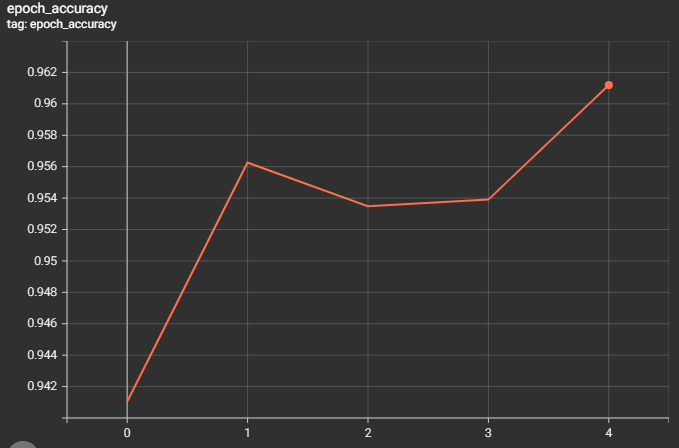

In [ ]:
#%load_ext tensorboard
%reload_ext tensorboard
%tensorboard --logdir logs/validation

#### Stage 4

In [ ]:
# Setups

lr = 0.00005
min_Lr = 0.00001
Epochs = 5


Image_Size = (480, 480) # 480, 640
Batch_Size = 2


## Стандартные размеры фото: 160, 213 ; 240, 320 ; 480, 640 ;   было 90, 120

In [ ]:
# B7   0%   5 Epochs, val_acc 0.9721 --> 0.9730 (2) ,  63*5 minutes (при batch_size = 2  и min_Lr = 0.00005)

base_model.trainable = False
model_1.fit(datagen_IDG_train(Image_Size, Batch_Size), validation_data=datagen_IDG_val(Image_Size, Batch_Size), callbacks=[reduce_lr, Checkpoint, Stopping, tensorboard_callback], epochs=Epochs) # Epochs

In [ ]:
# Отключаем/включаем слои в базовой модели

base_model.trainable = False
base_model.trainable = True

freeze_at = int(len(base_model.layers)*.001)

for layer in base_model.layers[:freeze_at]:
    layer.trainable =  False

print(f"В базовой модели {len(base_model.layers)} слоев, из них {len(base_model.trainable_variables)} включены")

In [ ]:
# B3 100% + callbacks  ReduceLROnPlateau lr 0.0009, image_size = (480, 640) batch_size = 16, validation_split=0.3 
# val_acc 0.9367 --> 0.88 ?

# B5 100% 
# 5 Epochs, val_acc 0.96? --> 0.9738 , ? minutes (при batch_size = 4  и min_Lr = 0.00001) 

# B7 100% 
# 5 Epochs, val_acc 0.9711 --> 0.9745 , ? minutes (при batch_size = 2  и min_Lr = 0.00001)

# B3 100%  5 Epochs, val_acc 0.9657 --> 0.9715 , 22*3 minutes (при batch_size = 2  и min_Lr = 0.00005)
# B3 100% 5 Epochs, val_acc 0.9721 --> 0.9747 (5), 5*17 minutes (при batch_size = 2 и Lr 0.00005 => 0.00001, (480, 480))


# B6 100%  3 Epochs, val_acc 0.9636 --> 0.9659 , 50*3 minutes (при batch_size = 2  и min_Lr = 0.00009)

# B7 100%  5 Epochs, val_acc 0.9681 --> 0.9711, 62*5 minutes (при batch_size = 2 и Lr 0.0005 => 0.00005)
# B7 100%  3 Epochs, val_acc 0.9 --> 0.9, *5 minutes (при batch_size = 2 и Lr 0.0005 => 0.00005)


model_1.fit(datagen_IDG_train(Image_Size, Batch_Size), validation_data=datagen_IDG_val(Image_Size, Batch_Size), callbacks=[reduce_lr, Checkpoint, Stopping, tensorboard_callback], epochs=Epochs) # Epochs

In [ ]:
# Дообучение на суб-выборке
# model_1.fit(datagen_IDG_train(Image_Size, Batch_Size), validation_data=datagen_IDG_val(Image_Size, Batch_Size), callbacks=[reduce_lr, Checkpoint, Stopping, tensorboard_callback], epochs=Epochs) # Epochs

In [ ]:
#%load_ext tensorboard
%reload_ext tensorboard
%tensorboard --logdir logs/validation